In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
task2 = pd.read_csv(r'Mall_Customers.csv') 
task2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
np.random.seed(42)
data = {
    'PurchaseAmount': np.random.rand(100) * 1000,  
    'Frequency': np.random.randint(1, 11, 100),  }

/Users/siribalakrishnareddy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


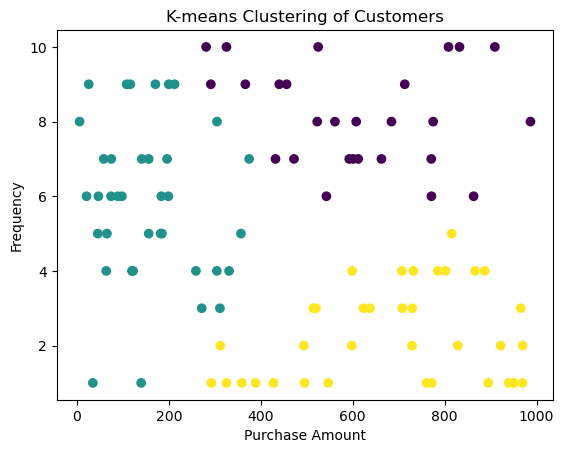

In [44]:
df = pd.DataFrame(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
plt.scatter(df['PurchaseAmount'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [45]:
wcss = [] 

In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

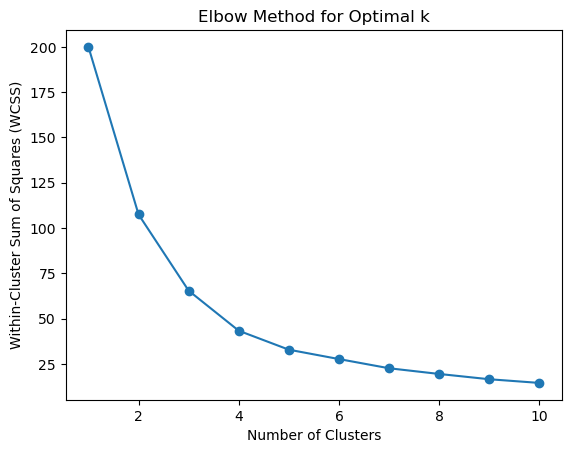

In [47]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [48]:
optimal_k = 3

In [49]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

/Users/siribalakrishnareddy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


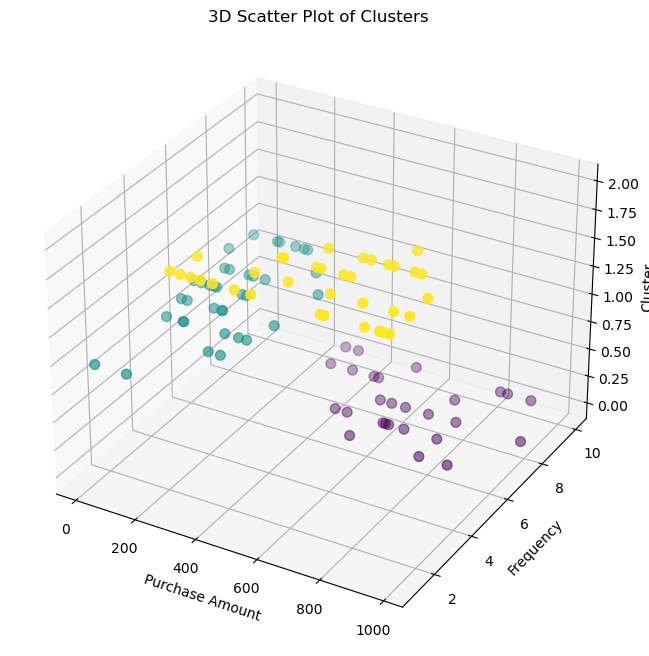

In [50]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PurchaseAmount'], df['Frequency'], df['Cluster'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Purchase Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Cluster')
plt.show()

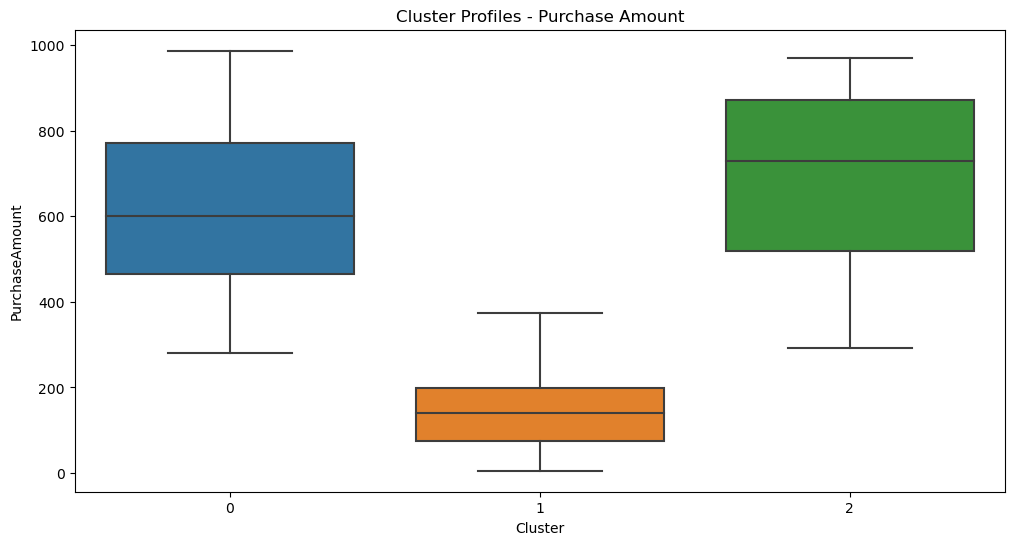

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='PurchaseAmount', data=df)
plt.title('Cluster Profiles - Purchase Amount')
plt.show()

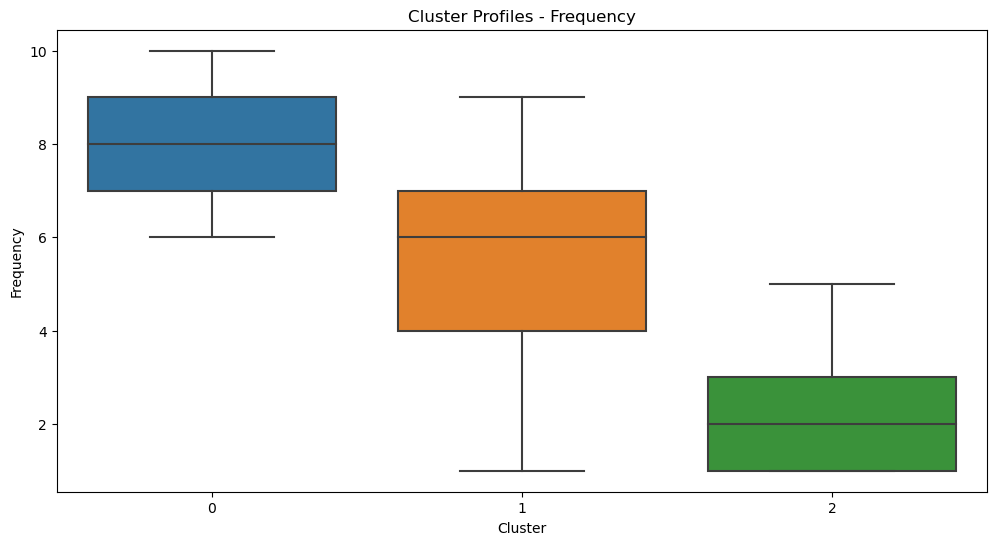

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Frequency', data=df)
plt.title('Cluster Profiles - Frequency')
plt.show()